In [56]:
#1.Quick Understanding of Data

#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols

In [57]:
print(os.getcwd())

D:\insofe\module2\day4


In [58]:
#Reading the data
data=pd.read_csv('./Data/RetailCustomerRevenue.csv')

In [59]:
#data dimensions
data.shape

(2938, 12)

In [60]:
#To get column names
data.columns

Index(['PersonID', 'Amount', 'FamilySize', 'Distance', 'Duration',
       'DirectVisits', 'OnlineVisits', 'Quantity', 'NumberofFrequentItems',
       'TransactionMode', 'Area', 'Occupation'],
      dtype='object')

In [61]:
data.head(3)

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,C1104,3125,2,6,261,11,9,365,11,2,Area1,2
1,C1111,5298,2,5,323,9,9,218,3,2,Area1,1
2,C1117,4375,2,6,355,11,11,1367,11,2,Area1,2


In [62]:
data.tail(3)

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
2935,C4301,4388,3,8,313,15,15,952,10,2,Area1,3
2936,C4303,6532,3,7,424,32,29,5933,29,2,Area1,3
2937,C4305,3313,3,6,365,16,16,827,16,2,Area1,1


In [63]:
#Checking the datatypes of the various attributes
data.dtypes

PersonID                 object
Amount                    int64
FamilySize                int64
Distance                  int64
Duration                  int64
DirectVisits              int64
OnlineVisits              int64
Quantity                  int64
NumberofFrequentItems     int64
TransactionMode           int64
Area                     object
Occupation                int64
dtype: object

In [64]:
#Statistical description of the data
data.describe(include='all')

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
count,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938,2938.000000
unique,2938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,C2641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area1,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2600,NaN
mean,NaN,4209.432267,3.116065,7.353642,349.146698,16.283186,14.745405,1600.154527,14.780463,1.821647,NaN,2.045950
std,NaN,2069.917106,1.038815,2.989459,89.621938,8.494674,7.310646,1920.046598,8.822916,0.382874,NaN,0.818329
min,NaN,2500.000000,2.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,1.000000
25%,NaN,2897.250000,2.000000,6.000000,305.000000,11.000000,10.000000,444.000000,10.000000,2.000000,NaN,1.000000
50%,NaN,3512.000000,3.000000,7.000000,368.000000,14.000000,13.000000,1028.500000,13.000000,2.000000,NaN,2.000000
75%,NaN,4772.500000,4.000000,8.000000,418.000000,19.000000,17.000000,2047.250000,19.000000,2.000000,NaN,3.000000


In [65]:
#Checking attributes with unique values
ins=[]
for x in data.columns:
  if(data[x].nunique() <10):
    ins.append(x)
    print(x,data[x].nunique())
    print(data[x].unique())

TransactionMode 2
[2 1]
Area 2
['Area1' 'Area2']
Occupation 3
[2 1 3]


In [66]:
#Transaction Mode has 2 unique values
#Area has 2 unique values
#Occupation has 3 unique values

In [67]:
#Conversion to category data type
data['TransactionMode']=data['TransactionMode'].astype("category")
data['Area']=data['Area'].astype("category")
data['Occupation']=data['Occupation'].astype("category")

In [68]:
#Checking the attributes of the data types after conversion
data.dtypes

PersonID                   object
Amount                      int64
FamilySize                  int64
Distance                    int64
Duration                    int64
DirectVisits                int64
OnlineVisits                int64
Quantity                    int64
NumberofFrequentItems       int64
TransactionMode          category
Area                     category
Occupation               category
dtype: object

In [69]:
#Checking for duplicate values
data[data.duplicated()]

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation


In [70]:
#Checking for missing values
data.isna().sum()

PersonID                 0
Amount                   0
FamilySize               0
Distance                 0
Duration                 0
DirectVisits             0
OnlineVisits             0
Quantity                 0
NumberofFrequentItems    0
TransactionMode          0
Area                     0
Occupation               0
dtype: int64

In [71]:
#No missing values
#No duplicates

In [72]:
#Deleting PersonID attribute as it has no contribution for the model.
data.drop('PersonID',axis=1,inplace=True)

In [73]:
data.describe(include='all')

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.0,2938,2938.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Area1,3.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2414.0,2600,1054.0
mean,4209.432267,3.116065,7.353642,349.146698,16.283186,14.745405,1600.154527,14.780463,NaN,NaN,NaN
std,2069.917106,1.038815,2.989459,89.621938,8.494674,7.310646,1920.046598,8.822916,NaN,NaN,NaN
min,2500.000000,2.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2897.250000,2.000000,6.000000,305.000000,11.000000,10.000000,444.000000,10.000000,NaN,NaN,NaN
50%,3512.000000,3.000000,7.000000,368.000000,14.000000,13.000000,1028.500000,13.000000,NaN,NaN,NaN
75%,4772.500000,4.000000,8.000000,418.000000,19.000000,17.000000,2047.250000,19.000000,NaN,NaN,NaN


In [74]:
#Correlation Analysis
data.corr()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems
Amount,1.000000,0.101605,-0.000649,0.122863,0.661911,0.751496,0.239952,0.496008
FamilySize,0.101605,1.000000,0.436628,0.081646,0.131551,0.127229,0.167357,0.125670
Distance,-0.000649,0.436628,1.000000,-0.057219,-0.004709,-0.012891,-0.002030,-0.010339
Duration,0.122863,0.081646,-0.057219,1.000000,0.207336,0.196975,0.230608,0.200766
DirectVisits,0.661911,0.131551,-0.004709,0.207336,1.000000,0.934496,0.298580,0.949014
OnlineVisits,0.751496,0.127229,-0.012891,0.196975,0.934496,1.000000,0.321901,0.869229
Quantity,0.239952,0.167357,-0.002030,0.230608,0.298580,0.321901,1.000000,0.302033
NumberofFrequentItems,0.496008,0.125670,-0.010339,0.200766,0.949014,0.869229,0.302033,1.000000


In [75]:
#Visualization
#Scatter plots between numerical attributes and amount
amt=data.Amount
fs=data.FamilySize
dis=data.Distance
dur=data.Duration
dv=data.DirectVisits
ov=data.OnlineVisits
q=data.Quantity
nfi=data.NumberofFrequentItems

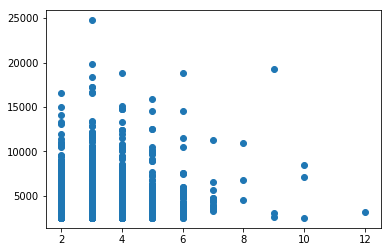

In [76]:
plt.scatter(fs,amt)

Families with size less than 6 spent more amount

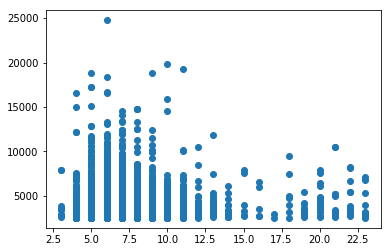

In [77]:
plt.scatter(dis,amt)

People within the range of 3 to 11 kms spent more amount People too close have rarely spent People too far also have spent significant amount Gradually as the distance increased,amonut spent decreased in a irregular fashion

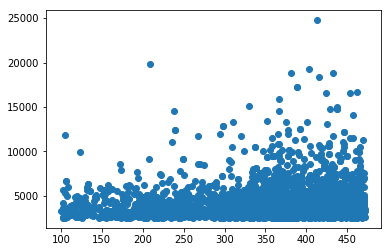

In [78]:
plt.scatter(dur,amt)

With the time spent,amount spent increased

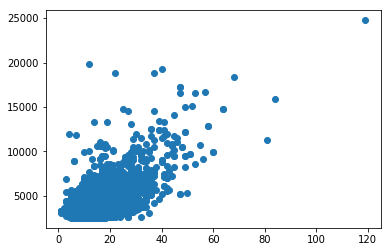

In [79]:
plt.scatter(dv,amt)

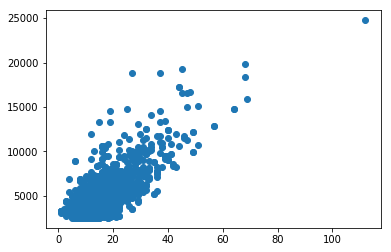

In [80]:
plt.scatter(ov,amt)

In [81]:
#The correlation between amount vs direct visits and amount vs online visits is positive
#Whether it is online visits/direct visits,as the number of visits increases,amount spent increases but in a irregular fashion

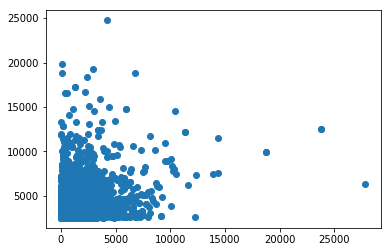

In [82]:
plt.scatter(q,amt)

In [83]:
As qunatity increases ,amount spent increases

SyntaxError: invalid syntax (<ipython-input-83-5f25ae79ebce>, line 1)

In [ ]:
plt.plot(data['NumberofFrequentItems'],data['Amount'])

In [ ]:

Amount spent increases as the NumberofFrequentItems increases(basically increase in the number of items)

In [ ]:
#Exploratory data analysis for categorical variables
plt.bar(data['TransactionMode'].unique(),data['TransactionMode'].value_counts())
plt.show()

In [ ]:
plt.bar(data['Area'].unique(),data['Area'].value_counts())
plt.show()

In [ ]:
plt.bar(data['Occupation'].unique(),data['Occupation'].value_counts())
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
sns.lmplot(x='DirectVisits', y='Amount', data=data)
plt.show()

In [ ]:
sns.lmplot(x='OnlineVisits', y='Amount', data=data)
plt.show()

In [ ]:
sns.lmplot(x='NumberofFrequentItems', y='Amount', data=data)
plt.show()

In [ ]:
#The problem is regression
#We should use multiple linear regression algorithm

In [84]:
#Experiment 1
#With test_size=0.2

In [85]:
#Splitting of data into train and test sets

traindata,testdata=train_test_split(data,test_size=0.2,random_state=123)

In [86]:
print(traindata.shape)
print(testdata.shape)

(2350, 11)
(588, 11)


In [87]:
#Dummification of category variable and dropping first column of each category variable to prevent dummy trap
cols=['TransactionMode','Area','Occupation']
train_dumped=pd.get_dummies(columns=cols,data=traindata,prefix=cols,drop_first=True)
test_dumped=pd.get_dummies(columns=cols,data=testdata,prefix=cols,drop_first=True)

In [88]:
train_dumped.head()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode_2,Area_Area2,Occupation_2,Occupation_3
1155,3318,2,6,436,12,12,5233,12,1,1,1,0
937,2500,3,9,365,7,6,492,7,1,0,0,0
973,2963,4,14,379,22,14,1486,22,0,0,1,0
2081,3500,4,7,235,2,2,20,1,1,0,0,1
354,6875,2,8,447,21,21,982,21,1,0,0,1


In [89]:
test_dumped.head()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode_2,Area_Area2,Occupation_2,Occupation_3
775,3375,3,7,409,13,13,1102,13,1,0,0,1
527,3001,6,10,377,22,19,8148,22,1,0,0,1
553,2875,3,8,287,15,10,153,15,1,0,1,0
2670,2813,2,4,339,14,13,1353,14,1,0,1,0
2047,4188,4,13,381,15,14,629,15,1,0,0,0


In [90]:
#Only independent variables
ind_atr=list((set(train_dumped.columns))-set(['Amount']))
ind_atr

['DirectVisits',
 'Distance',
 'TransactionMode_2',
 'Occupation_3',
 'Quantity',
 'OnlineVisits',
 'FamilySize',
 'Duration',
 'Occupation_2',
 'Area_Area2',
 'NumberofFrequentItems']

In [91]:
#Create object for LinearRegression
linreg=LinearRegression()
#Fit a linearRegression model
res_sklearn=linreg.fit(train_dumped[ind_atr],train_dumped['Amount'])

In [92]:
#Predicting the values for test and train data
pred_train_sklearn=res_sklearn.predict(train_dumped[ind_atr])
pred_test_sklearn=res_sklearn.predict(test_dumped[ind_atr])

In [93]:
#Checking coefficient and intercept of regression line
print(res_sklearn.coef_)
print(res_sklearn.intercept_)

[ 2.62546923e+02 -9.47350161e+00  2.64208385e+02 -1.19694407e+01
  3.84743602e-02  2.32211345e+02  4.71029449e+01 -5.25526037e-01
  1.74437523e+01  3.03238628e+02 -2.91464118e+02]
611.5385333782915


In [94]:
#Coefficients are significant,hence all these features impact revenue of retail store

In [95]:
print(mean_absolute_error(np.array(train_dumped['Amount']),pred_train_sklearn))
print(mean_absolute_error(np.array(test_dumped['Amount']),pred_test_sklearn))

793.2396053830868
778.8292727155107


In [96]:
from math import sqrt
print(sqrt(mean_squared_error(np.array(train_dumped['Amount']),pred_train_sklearn)))
print(sqrt(mean_squared_error(np.array(test_dumped['Amount']),pred_test_sklearn)))

1100.0225506551187
1108.8525142846127


In [97]:
#Experiment 2
#With test_size=0.33

In [98]:
traindata2,testdata2=train_test_split(data,test_size=0.33,random_state=123)

In [99]:
traindata2.shape
testdata2.shape

(970, 11)

In [100]:
train_dumped2=pd.get_dummies(columns=cols,data=traindata2,prefix=cols,drop_first=True)
test_dumped2=pd.get_dummies(columns=cols,data=testdata2,prefix=cols,drop_first=True)

In [101]:
train_dumped2.head()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode_2,Area_Area2,Occupation_2,Occupation_3
1400,3380,3,7,260,11,11,806,10,1,0,1,0
1872,6250,4,7,183,35,29,765,35,1,0,0,1
2907,3438,2,7,303,11,11,97,11,1,0,0,1
183,2936,4,8,351,7,8,334,2,1,0,0,1
155,3563,3,6,417,19,14,199,19,1,0,0,0


In [102]:
test_dumped.head()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode_2,Area_Area2,Occupation_2,Occupation_3
775,3375,3,7,409,13,13,1102,13,1,0,0,1
527,3001,6,10,377,22,19,8148,22,1,0,0,1
553,2875,3,8,287,15,10,153,15,1,0,1,0
2670,2813,2,4,339,14,13,1353,14,1,0,1,0
2047,4188,4,13,381,15,14,629,15,1,0,0,0


In [103]:
ind_atr2=list((set(train_dumped2.columns))-set(['Amount']))
ind_atr2

['DirectVisits',
 'Distance',
 'TransactionMode_2',
 'Occupation_3',
 'Quantity',
 'OnlineVisits',
 'FamilySize',
 'Duration',
 'Occupation_2',
 'Area_Area2',
 'NumberofFrequentItems']

In [104]:
pred_train_sklearn2=res_sklearn.predict(train_dumped2[ind_atr])
pred_test_sklearn2=res_sklearn.predict(test_dumped2[ind_atr])

In [105]:
print(res_sklearn.coef_)
print(res_sklearn.intercept_)

[ 2.62546923e+02 -9.47350161e+00  2.64208385e+02 -1.19694407e+01
  3.84743602e-02  2.32211345e+02  4.71029449e+01 -5.25526037e-01
  1.74437523e+01  3.03238628e+02 -2.91464118e+02]
611.5385333782915


In [106]:
print(mean_absolute_error(np.array(train_dumped2['Amount']),pred_train_sklearn2))
print(mean_absolute_error(np.array(test_dumped2['Amount']),pred_test_sklearn2))

793.9178203058813
783.1282625206181


In [110]:
from math import sqrt
print(sqrt(mean_squared_error(np.array(train_dumped2['Amount']),pred_train_sklearn2)))
print(sqrt(mean_squared_error(np.array(test_dumped2['Amount']),pred_test_sklearn2)))

1099.176508534749
1107.0897738926558


OLS Model

In [111]:
print(data.columns)

Index(['Amount', 'FamilySize', 'Distance', 'Duration', 'DirectVisits',
       'OnlineVisits', 'Quantity', 'NumberofFrequentItems', 'TransactionMode',
       'Area', 'Occupation'],
      dtype='object')


In [114]:
#Seperating input columns
ind_atr=list((set(data.columns))-set(['Amount','PersonID']))
print(ind_atr)

['TransactionMode', 'DirectVisits', 'Distance', 'Area', 'Quantity', 'OnlineVisits', 'FamilySize', 'Occupation', 'Duration', 'NumberofFrequentItems']


In [115]:
#Joining input columns by '+'
x='+'.join(ind_atr)
x

'TransactionMode+DirectVisits+Distance+Area+Quantity+OnlineVisits+FamilySize+Occupation+Duration+NumberofFrequentItems'

In [116]:
#Joining output column by '~'
formula=" ~ ".join(('Amount',x))
print(formula)

Amount ~ TransactionMode+DirectVisits+Distance+Area+Quantity+OnlineVisits+FamilySize+Occupation+Duration+NumberofFrequentItems


In [117]:
lm_mod=ols(formula=formula,data=data)
#Fit a ols model
result=lm_mod.fit()

In [118]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     673.3
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:31:27   Log-Likelihood:                -24747.
No. Observations:                2938   AIC:                         4.952e+04
Df Residuals:                    2926   BIC:                         4.959e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               621.34

In [ ]:
#If the value of the coefficient is less than 0.05 than it is significant
#SquaredR value is quite significant,good model fit
#All the above features affect revenue generated